In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rad2deg=180./np.pi

In [3]:
d=pd.read_csv("alerts.txt",sep='|')

(array([ 93.,  64.,  42.,  33.,  23.,  13.,  14.,  20.,  13.,  10.,  12.,
         11.,  20.,  12.,  14.,  16.,  17.,  14.,  11.,  14.,  14.,  15.,
          7.,  11.,  16.,   9.,  12.,   7.,   3.,   5.,   6.,   4.,   0.,
          4.,   3.,   4.,   2.,   2.,   4.,   1.,   1.,   1.,   2.,   2.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([  5.00076815,   5.1475744 ,   5.29438065,   5.4411869 ,
          5.58799315,   5.73479939,   5.88160564,   6.02841189,
          6.17521814,   6.32202439,   6.46883064,   6.61563688,
          6.76244313,   6.90924938,   7.05605563,   7.20286188,
          7.34966812,   7.49647437,   7.64328062,   7.79008687,
          7.93689312,   8.08369936,   8.23050561,   8.37731186,
          8.52411811,   8.67092436,   8.81773061,   8.96453685,
          9.1113431 ,   9.25814935,   9.4049556 ,   9.55176185,
          9.69856809,   9.84537434,   9.99218059,  10.13898684,
         10.28579309,  10.43259934,  10.57940558,  10.72621183,
         10.873018

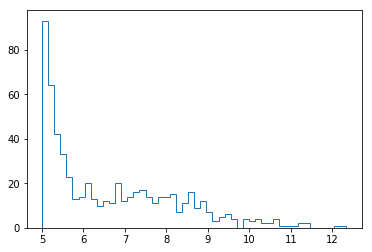

In [4]:
hist(d['signif'],bins=50,histtype='step')

(array([  35.,    2.,   98.,  112.,    3.,    0.,    0.,  169.,   55.,
          20.,   10.,   23.,   20.,    5.,   20.,    3.,    6.,    1.,
           5.,    1.,    6.,    3.,    1.,    0.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([ 0.05725982,  0.06529054,  0.07332126,  0.08135199,  0.08938271,
         0.09741344,  0.10544416,  0.11347489,  0.12150561,  0.12953634,
         0.13756706,  0.14559779,  0.15362851,  0.16165924,  0.16968996,
         0.17772069,  0.18575141,  0.19378214,  0.20181286,  0.20984358,
         0.21787431,  0.22590503,  0.23393576,  0.24196648,  0.24999721,
         0.25802793,  0.26605866,  0.27408938,  0.28212011,  0.29015083,
         0.29818156,  0.30621228,  0.31424301,  0.32227373,  0.33030446,
         0.33833518,  0.3463659 ,  0.35439663,  0.36242735,  0.37045808,
         0.37848

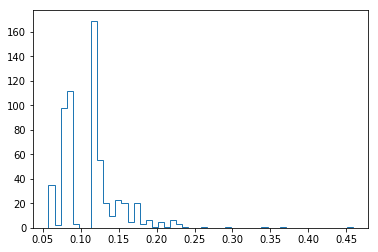

In [5]:
hist(d['porErr']*rad2deg,bins=50,histtype='step')

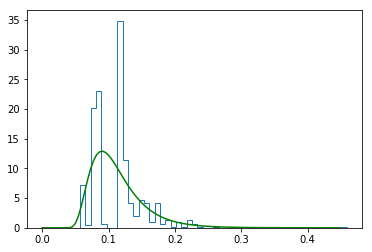

In [6]:
from scipy.stats import lognorm
param = lognorm.fit(d['porErr']*rad2deg,loc=0)
x=np.linspace(0,0.45,100)

pdf_fitted = lognorm.pdf(x, param[0], loc=param[1], scale=param[2])
plt.plot(x,pdf_fitted,'g-')
h=hist(d['porErr']*rad2deg,bins=50,histtype='step',normed=True)

In [7]:
mu = np.log(param[2])
sigma = param[0]
E = np.exp(mu + 0.5*sigma**2)
print param[0],param[1],param[2]

0.463632912751 0.0302994104141 0.0741518054165


In [8]:
lognorm.rvs(param[0], loc=param[1], scale=param[2], size=1, random_state=None)[0]

0.1087125656699003

In [9]:
import kent_distribution as kd

In [10]:
def car2sph(vec):
    x=vec[0]
    y=vec[1]
    z=vec[2]
    r=np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y,x)
    th = np.arctan2(np.sqrt(x**2+y**2),z)
    return r,th,phi

In [30]:
import healpy as hp
Nside = 64
m=np.zeros(hp.nside2npix(Nside))
events=1000

k=kd.kent(84*pi/180, 22*pi/180, 0.,  50.0, 0.0)
#kent recieves first RA and then Dec, it gives back values in x,y,z
#kappa gives the concentration, kappa=1000 gets into trouble
pos = k.rvs(events)
for i in xrange(events):
    r,th,phi = car2sph(pos[i])
    dec = th
    #phi%=2*np.pi
    #print th, dec
    pix = hp.ang2pix(Nside,dec,phi)
    m[pix]+=1
    

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


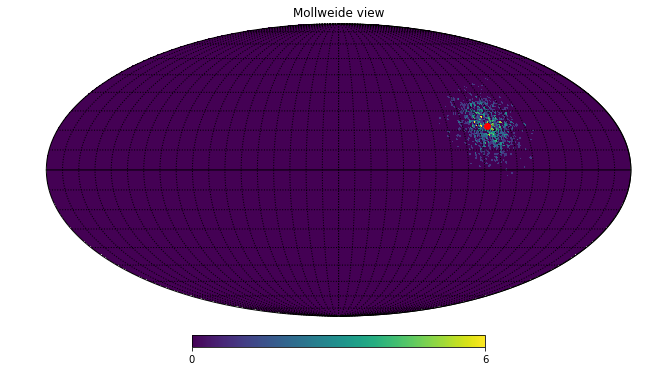

In [31]:
hp.mollview(m,rot=180)
hp.projscatter((90-22.0)*np.pi/180,84*np.pi/180,color='r')
hp.graticule(dpar=10)

In [29]:
pos[0]

array([ 0.15604858,  0.8938702 ,  0.42029146])